## 3.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

In [2]:
from google.colab import drive

In [3]:
# get size of the variable in megabytes
def get_variable_size(var):
    display(sys.getsizeof(var)/ (1024**2))

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
taxi_data_clean = pd.read_csv('/content/drive/MyDrive/UrfuCsvDatasets/RegressionProject5SecondSemester/taxi_data_clean.csv')

In [6]:
taxi_data_clean['trip_duration_log'] = np.log(taxi_data_clean['trip_duration'] + 1)

In [7]:
taxi_data_clean['trip_duration_log'][0]

6.1224928095143865

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log).
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным?
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$.

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

In [8]:
k2, p = stats.normaltest(taxi_data_clean['trip_duration_log'])
display((a := 0.05) < p)

False

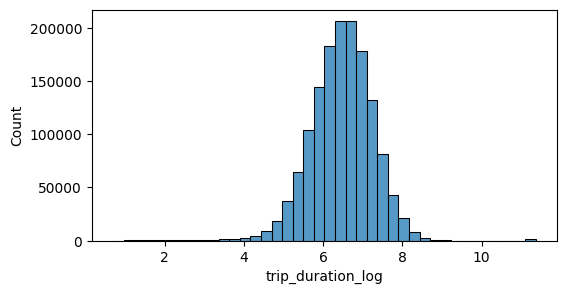

In [9]:
plt.figure(figsize=(6, 3))
sns.histplot(taxi_data_clean['trip_duration_log'], bins=40)
plt.show()

In [10]:
trip_duration_log_df = taxi_data_clean['trip_duration_log']

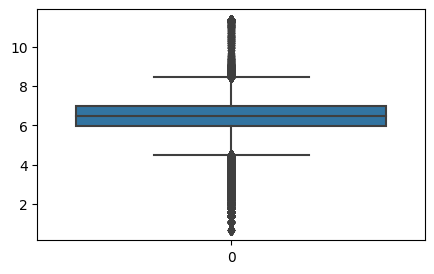

In [11]:
plt.figure(figsize=(5, 3))
sns.boxplot(trip_duration_log_df)
plt.show()

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

Сравните два распределения между собой.

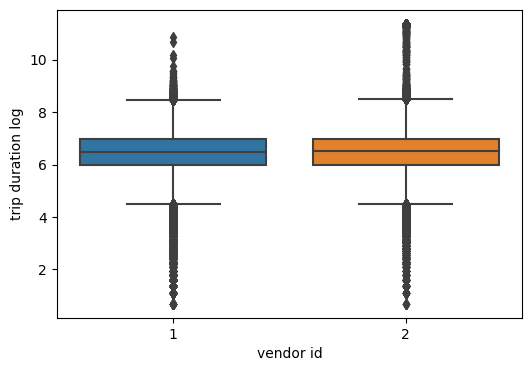

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='vendor_id', y='trip_duration_log', data=taxi_data_clean)
plt.xlabel('vendor id')
plt.ylabel('trip duration log')
plt.show()

#### Counts as almost the same

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag).

Сравните два распределения между собой.

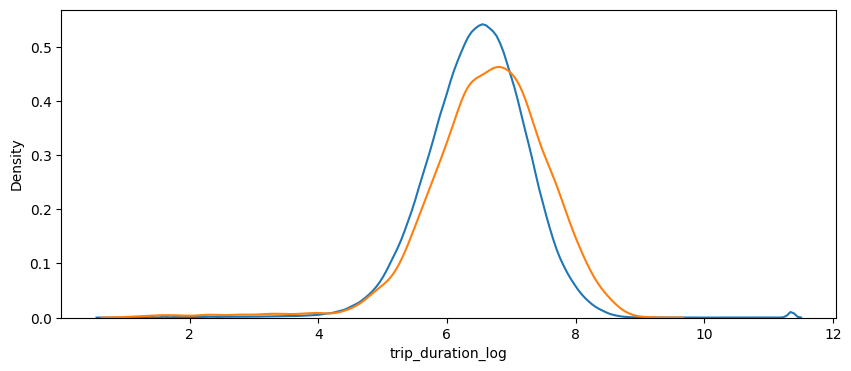

In [13]:
plt.figure(figsize=(10, 4))

sns.kdeplot(
    data=taxi_data_clean[taxi_data_clean['store_and_fwd_flag'] == 'N'],
    x='trip_duration_log',
    label='N',
    common_norm=True
)

sns.kdeplot(
    data=taxi_data_clean[taxi_data_clean['store_and_fwd_flag'] == 'Y'],
    x='trip_duration_log',
    label='Y',
    common_norm=False
)

plt.show()

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

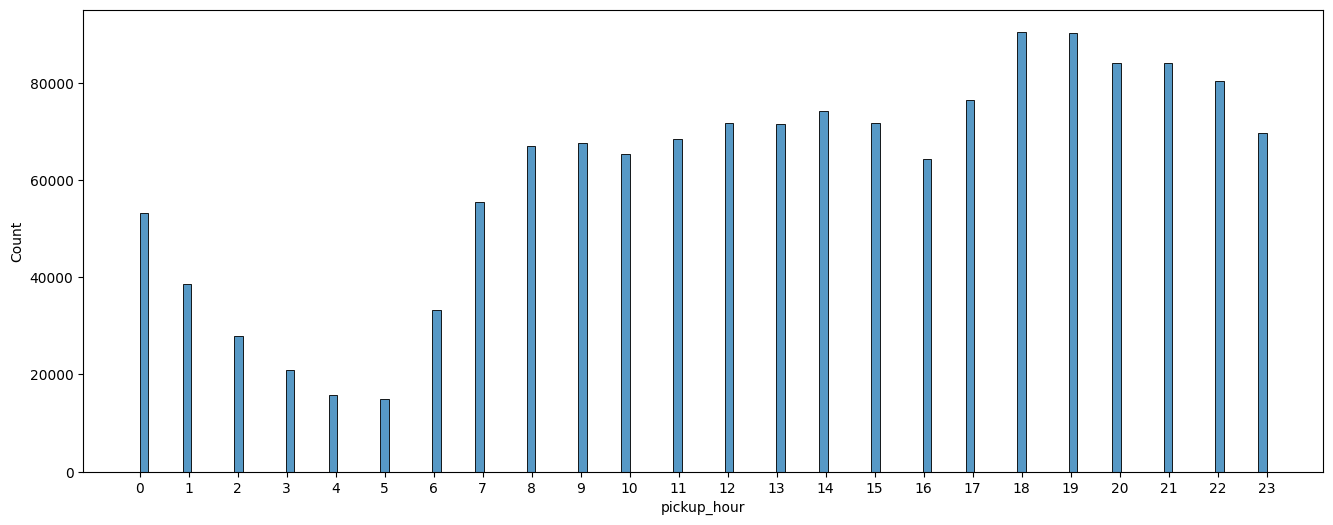

In [14]:
plt.figure(figsize=(16, 6))
plt.xticks(range(24))
sns.histplot(taxi_data_clean['pickup_hour'])
plt.show()

#### 00:00 - 5:00

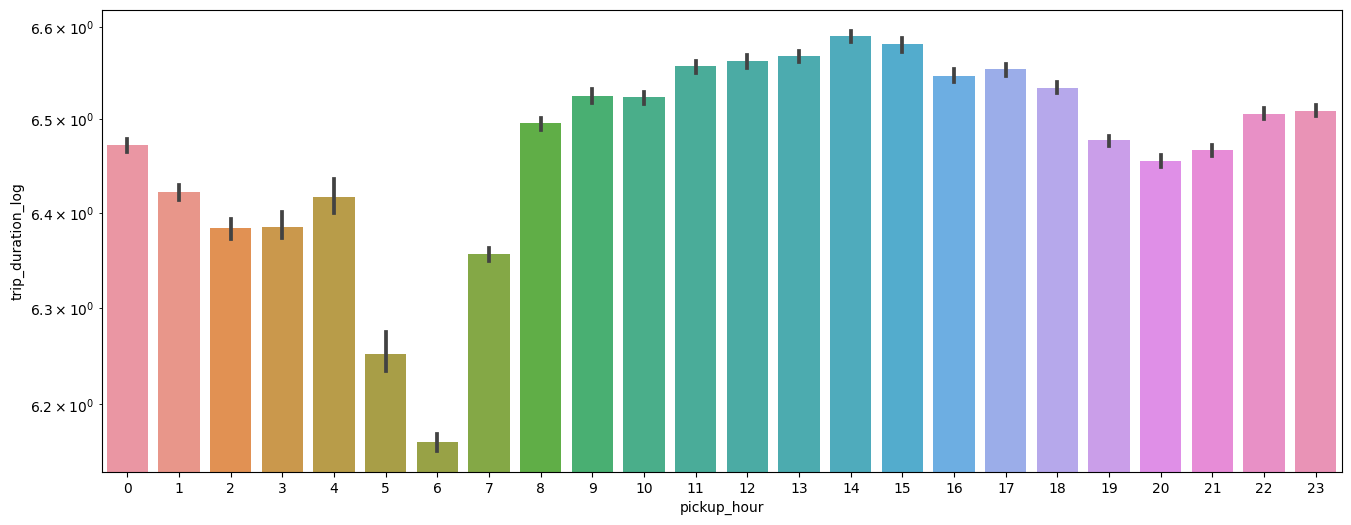

In [15]:
plt.figure(figsize=(16, 6))
plt.xticks(range(24))

fig = sns.barplot(
    x=taxi_data_clean['pickup_hour'],
    y=taxi_data_clean['trip_duration_log'],
    estimator=np.median,
)

fig.set_yscale('log')

plt.show()

#### 13:00 - 18:00

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


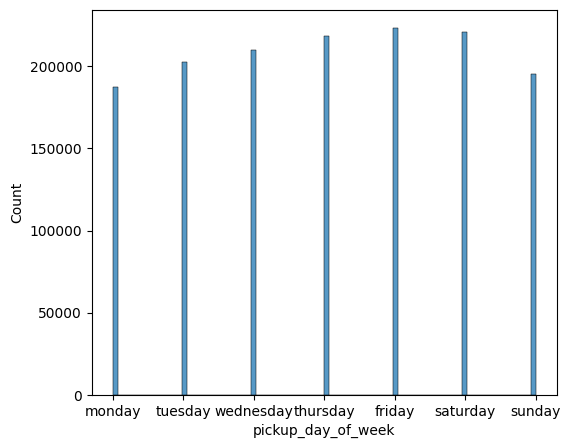

In [16]:
plt.figure(figsize=(6, 5))
sns.histplot(taxi_data_clean['pickup_day_of_week'])
plt.xticks([0,1,2,3,4,5,6], labels=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
plt.show()

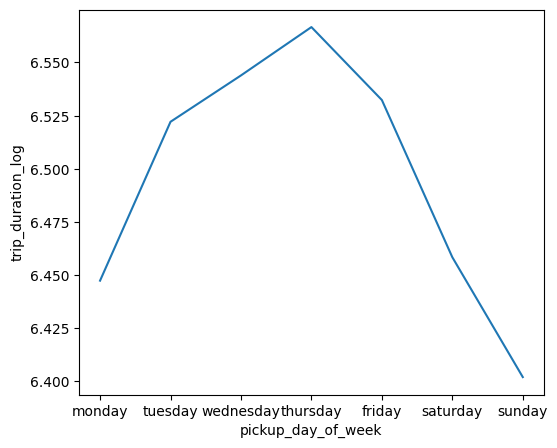

In [17]:
plt.figure(figsize=(6, 5))
sns.lineplot(taxi_data_clean.groupby('pickup_day_of_week')['trip_duration_log'].agg('median'))
plt.xticks([0,1,2,3,4,5,6], labels=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
plt.show()

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно.

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration).

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

In [18]:
median_table = taxi_data_clean.pivot_table(
    values='trip_duration',
    index='pickup_hour',
    columns='pickup_day_of_week',
    aggfunc='median',
)

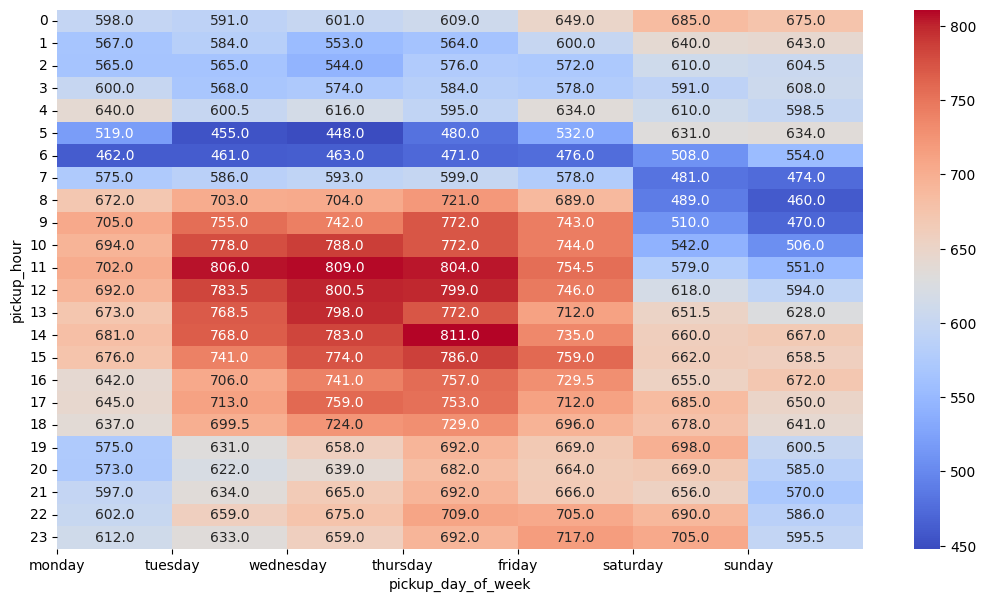

In [19]:
plt.figure(figsize=(13, 7))
sns.heatmap(median_table, cmap='coolwarm', annot=True, fmt='.1f', cbar=True)
plt.xticks([0,1,2,3,4,5,6], labels=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'])
plt.yticks(rotation=0)
plt.show()

```
A. The longest trips (in the median sense) are observed from Monday to Friday between 8 a.m. and 6 p.m.
B. The highest median trip length was observed on Thursday at 2 p.m.
```

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude)
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude).
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее.

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.


In [20]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

0

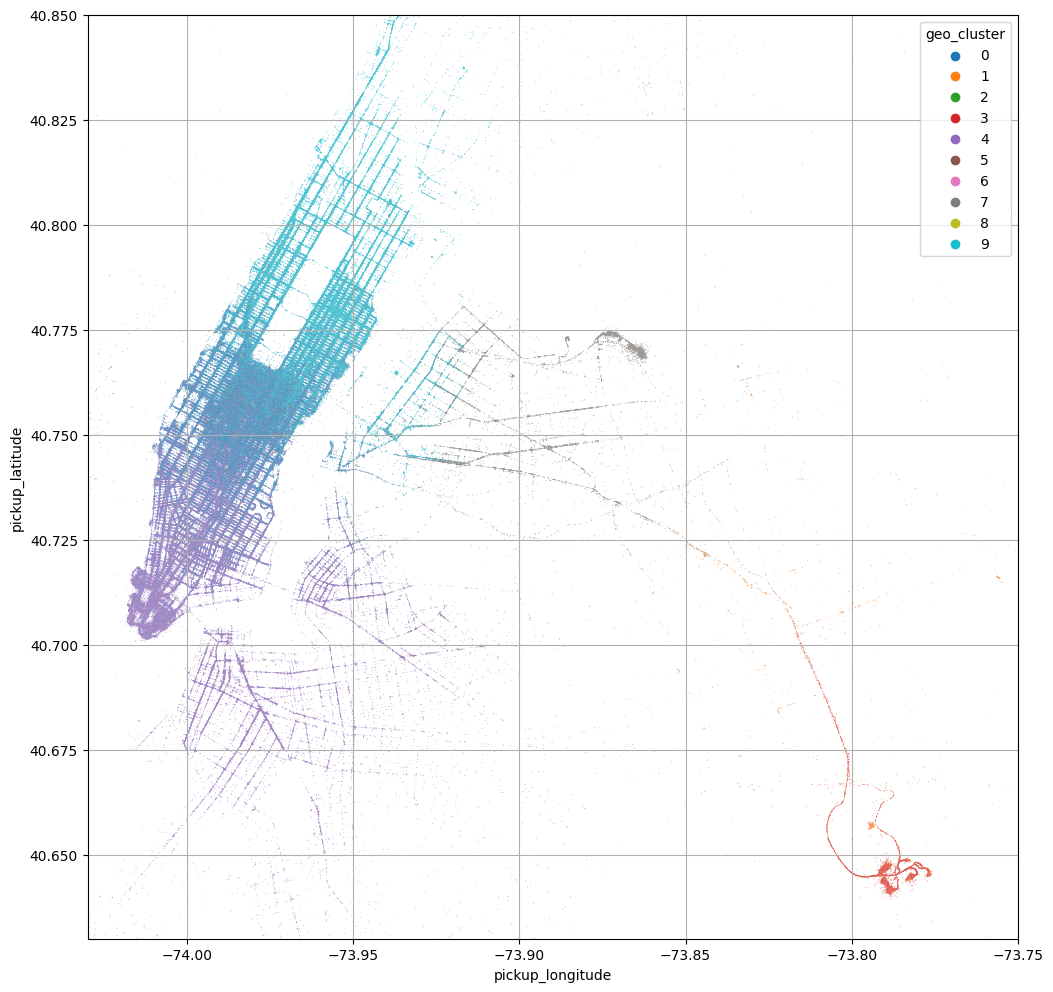

In [21]:
plt.figure(figsize=(12, 12))
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.grid()

sns.scatterplot(
    data=taxi_data_clean,
    x='pickup_longitude',
    y='pickup_latitude',
    hue='geo_cluster',
    palette='tab10',
    s=0.25
)

handles, labels = plt.gca().get_legend_handles_labels()
not_displayed_qty = len(labels) - len(handles)
display(not_displayed_qty)

plt.show()

0

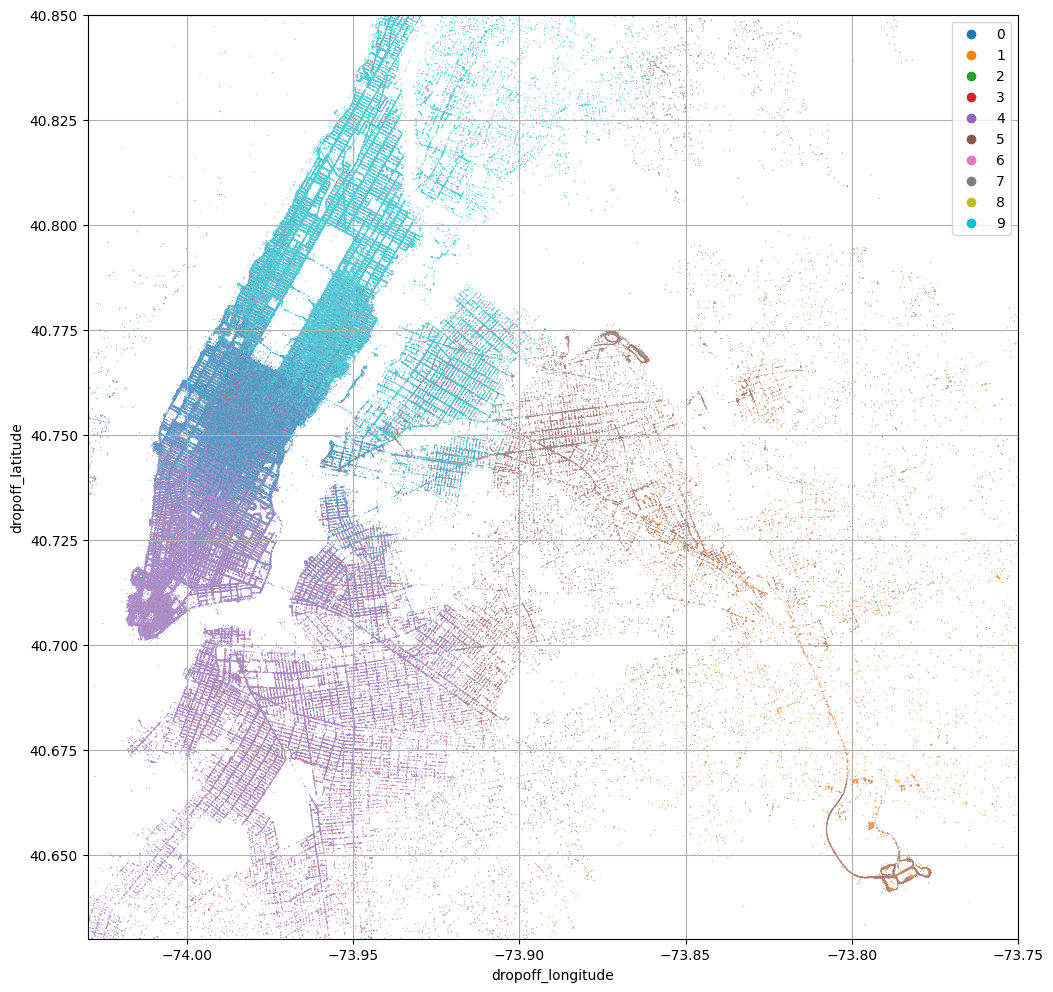

In [22]:
plt.figure(figsize=(12, 12))
plt.xlim(city_long_border)
plt.ylim(city_lat_border)
plt.grid()

sns.scatterplot(
    data=taxi_data_clean,
    x='dropoff_longitude',
    y='dropoff_latitude',
    hue='geo_cluster',
    palette='tab10',
    s=0.5
)

plt.legend(loc='upper right')

handles, labels = plt.gca().get_legend_handles_labels()
not_displayed_qty = len(labels) - len(handles)
display(not_displayed_qty)

plt.show()

In [23]:
taxi_data_clean.to_csv('/content/drive/MyDrive/UrfuCsvDatasets/RegressionProject5SecondSemester/taxi_data_clean_3.csv', index=False)